In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,VotingClassifier,BaggingClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score,f1_score
from sklearn.metrics import precision_recall_fscore_support as score
from xgboost import XGBClassifier
%matplotlib inline

In [2]:
df_tr = pd.read_csv(r'C:\Users\נעמיה\fashion-mnist_train.csv')
df_te = pd.read_csv(r'C:\Users\נעמיה\fashion-mnist_test.csv')

In [3]:
dictionary = {
    0 :'T-shirt',
    1 : 'Trouser',
    2 : 'Pullover',
    3 : 'Dress',
    4 : 'Coat',
    5 : 'Sandal',
    6 : 'Shirt',
    7 : 'Sneaker',
    8 : 'Bag',
    9 : 'Ankle boot'
}

# Getting the values from the dictionary
class_names = list(dictionary.values())

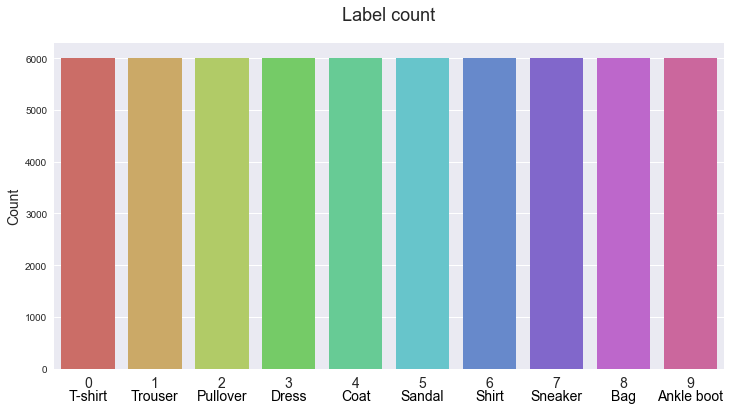

In [4]:
plt.style.use('seaborn')
fig, ax = plt.subplots(1,1, figsize = (12,6))
sns.countplot(x='label', data = df_tr, ax = ax,palette="hls")

for i, counter in zip(ax.patches, range(0,10)):
        ax.text(x = i.get_x() + i.get_width()/2, y = -600,
                s = f"{class_names[counter]}",
                ha = 'center', size = 14, rotation = 0, color = 'black')

ax.set_title('Label count', fontsize = 18, y = 1.05)
ax.set_xticklabels(list(range(0,10)), fontsize = 14)
ax.set_xlabel(None)
ax.set_ylabel('Count', fontsize = 14);


Text(0.5, 1.05, 'First 30 images of Fashion MNIST')

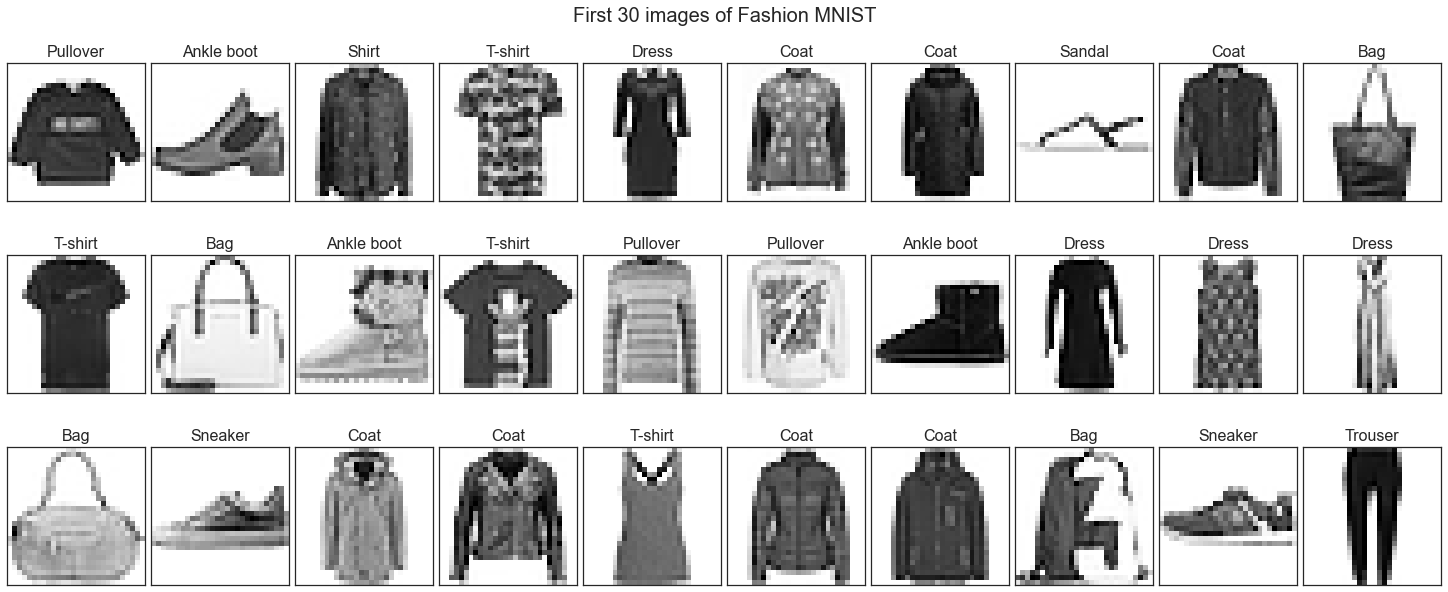

In [5]:
plt.style.use('seaborn-white')
fig, ax = plt.subplots(3,10, figsize = (20,8), constrained_layout = True)

for i, axis in zip(range(0,30), ax.ravel()):
    img = np.reshape(df_tr.iloc[i, 1:].values, (28,28))
    axis.imshow(img)
    title = dictionary[df_tr.iloc[i,0]]
    axis.set_title(title, fontsize = 16)
    axis.set_xticklabels("")
    axis.set_yticklabels("")
    
fig.suptitle('First 30 images of Fashion MNIST', size = 20, y=1.05)


In [6]:
df_tr

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
X = np.array(df_tr.iloc[:,1:])
y = np.array(df_tr.iloc[:,0])
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.1)

# x_train = np.array(df_tr.iloc[:,1:])
# y_train = np.array(df_tr.iloc[:,0])
# x_test = np.array(df_te.iloc[:,1:])
# y_test = np.array(df_te.iloc[:,0])

In [8]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [9]:
print('dimensions x_train:',x_train.shape)
print('dimensions x_test:',x_test.shape)

dimensions x_train: (54000, 784)
dimensions x_test: (6000, 784)


In [10]:
pca = PCA()
pca.fit(x_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)

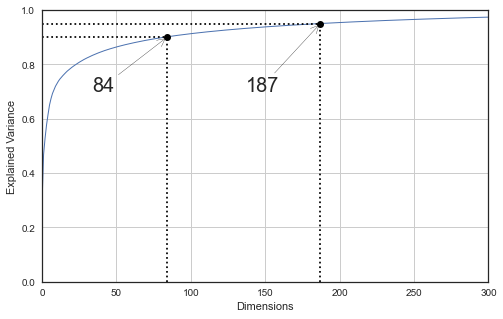

In [11]:

d = np.argmax(cumsum >= 0.95) + 1
d2 = np.argmax(cumsum >= 0.9) + 1
plt.figure(figsize=(8,5))
plt.plot(cumsum, linewidth=1)
plt.axis([0, 300, 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([d, d], [0, 0.95], "k:")
plt.plot([0, d], [0.95, 0.95], "k:")
plt.plot(d, 0.95, "ko")
plt.annotate(d, xy=(d, 0.95), xytext=(d-50, 0.7),
             arrowprops=dict(arrowstyle="->"), fontsize=20)
plt.plot([d2, d2], [0, 0.9], "k:")
plt.plot([0, d2], [0.9, 0.9], "k:")
plt.plot(d2, 0.9, "ko")
plt.annotate(d2, xy=(d2, 0.9), xytext=(d2-50, 0.7),
             arrowprops=dict(arrowstyle="->"), fontsize=20)
plt.grid(True)

plt.show()

In [12]:
pca = PCA(n_components=0.9)
x_train_pca=pca.fit_transform(x_train)
x_test_pca=pca.transform(x_test)

In [13]:
print('dimensions x_train_pca:',x_train_pca.shape)
print('dimensions x_test_pca:',x_test_pca.shape)

dimensions x_train_pca: (54000, 84)
dimensions x_test_pca: (6000, 84)


In [14]:
pipe_rf = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier())
])
pipe_rf.fit(x_train_pca, y_train)
pred=[]
rfpred = pipe_rf.predict(x_test_pca)
pred.append(rfpred)

In [15]:
pipe_lr = Pipeline([
    ('scaler', StandardScaler()),
    ('lr', LogisticRegression(max_iter=2000))
])
pipe_lr.fit(x_train_pca, y_train)
lrpred = pipe_lr.predict(x_test_pca)
pred.append(lrpred)

In [16]:
pipe_knn = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])
pipe_knn.fit(x_train_pca, y_train)
knnpred = pipe_knn.predict(x_test_pca)
pred.append(knnpred)

In [17]:
pipe_et = Pipeline([
    ('scaler', StandardScaler()),
    ('et', ExtraTreesClassifier())
])
pipe_et.fit(x_train_pca, y_train)
etpred = pipe_et.predict(x_test_pca)
pred.append(etpred)

In [19]:
pipe_xgb = Pipeline([
    ('scaler', StandardScaler()),
    ('xgb',XGBClassifier(n_estimators=500,use_label_encoder=False,eval_metric='mlogloss'))
])
pipe_xgb.fit(x_train_pca, y_train)
xgbpred = pipe_xgb.predict(x_test_pca)
pred.append(xgbpred)

In [20]:
rows, cols = (5, 10)
arr = [[0 for i in range(cols)] for j in range(rows)]
j=0
for i in pred:
    fscore = f1_score(y_test, i ,average=None)
    arr[j]=fscore
    j+=1
    

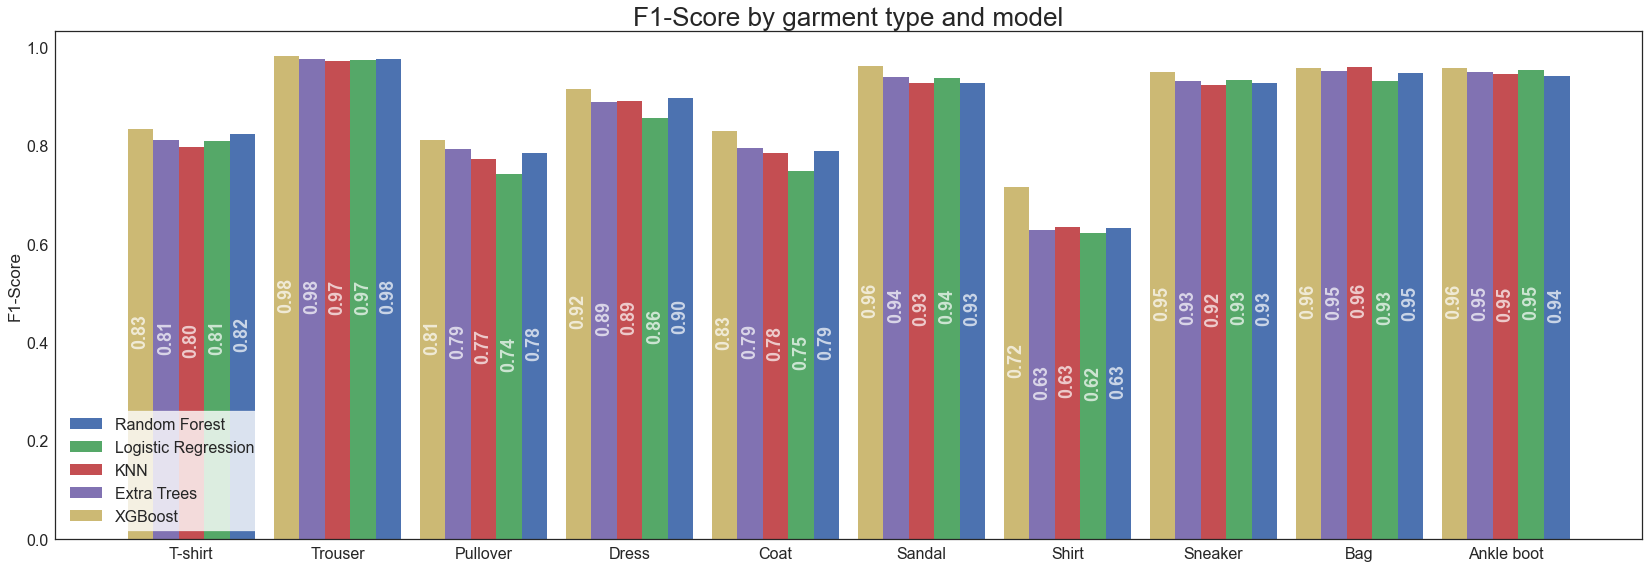

In [21]:
fig, ax = plt.subplots(figsize = (23,8))
width = 0.35;width2=width/2
rect=[];i=0
x=np.arange(len(class_names))
for i in range(5):
    rect.append(ax.bar(x+width,arr[i],width2, label='class_names'))
    width-=width2

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('F1-Score',fontsize=17)
ax.set_title('F1-Score by garment type and model',fontsize=26)
ax.set_xticks(x)
ax.tick_params(axis='both', which='major', labelsize=16)
ax.set_xticklabels(class_names)
legend=ax.legend(labels=['Random Forest','Logistic Regression','KNN','Extra Trees','XGBoost'],frameon = 2,loc='lower left',
         fontsize =16)
frame = legend.get_frame()
frame.set_color('white')
def axeplot(rect):
    ax.bar_label(rect, padding=3,fmt='%1.2f',label_type ='center',color='white',
                 fontweight='bold',fontsize=18,rotation=90,alpha=0.7)
for i in range(5):
    axeplot(rect[i])


fig.tight_layout()

In [22]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'rf__n_estimators': n_estimators,
               'rf__max_features': max_features,
               'rf__max_depth': max_depth,
               'rf__min_samples_split': min_samples_split,
               'rf__min_samples_leaf': min_samples_leaf,
               'rf__bootstrap': bootstrap}

In [23]:
rf_random = RandomizedSearchCV(estimator = pipe_rf, param_distributions = random_grid, cv = 5, n_jobs = -1)
rf_random.fit(x_train_pca, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('rf', RandomForestClassifier())]),
                   n_jobs=-1,
                   param_distributions={'rf__bootstrap': [True, False],
                                        'rf__max_depth': [10, 20, 30, 40, 50,
                                                          60, 70, 80, 90, 100,
                                                          110, None],
                                        'rf__max_features': ['auto', 'sqrt'],
                                        'rf__min_samples_leaf': [1, 2, 4],
                                        'rf__min_samples_split': [2, 5, 10],
                                        'rf__n_estimators': [200, 400, 600, 800,
                                                             1000, 1200, 1400,
                                                             1600, 1800,
                           

In [24]:
rf_random.best_params_

{'rf__n_estimators': 1000,
 'rf__min_samples_split': 5,
 'rf__min_samples_leaf': 1,
 'rf__max_features': 'auto',
 'rf__max_depth': 20,
 'rf__bootstrap': False}

In [25]:
rf_random.best_score_

0.8706111111111111

In [26]:
maxd = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None]
n_est= [200, 400, 600, 800, 1000, 1200, 1400,1600, 1800,2000]
lr= [0.1, 0.01,0.2,0.3, 0.05]
subsample= [0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
colsample_bytree= [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
colsample_bylevel=[0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
min_child_weight=[0.5, 1.0, 3.0, 5.0, 7.0, 10.0]
gamma=[0, 0.25, 0.5, 1.0]
reg_lambda= [0.1, 1.0, 5.0, 10.0, 50.0, 100.0]
parameters = dict(xgb__n_estimators=n_est,xgb__learning_rate=lr,xgb__colsample_bytree=colsample_bytree,
                  xgb__subsample=subsample,
                  xgb__colsample_bylevel=colsample_bylevel,
                  xgb__min_child_weight=min_child_weight,
                  xgb__reg_lambda=reg_lambda,
                  xgb__gamma=gamma,
                  xgb__max_depth=maxd)

In [ ]:
xg_grid = RandomizedSearchCV(estimator = pipe_xgb, param_distributions = parameters, cv = 3, n_jobs = -1)
xg_grid.fit(x_train_pca, y_train)

In [ ]:
xg_grid.best_params_

In [ ]:
xg_grid.best_score_

In [36]:
print('Accuracy RandomForest:',accuracy_score(y_test,rfpred))
print('Accuracy LogisticResgression:',accuracy_score(y_test,lrpred))
print('Accuracy KNN:',accuracy_score(y_test,knnpred))
print('Accuracy ExtraTree:',accuracy_score(y_test,etpred))

Accuracy RandomForest: 0.8336666666666667
Accuracy LogisticResgression: 0.8523333333333334
Accuracy KNN: 0.8428333333333333
Accuracy ExtraTree: 0.8675


In [43]:
j=0.95
for i in range(3):
    pipe_vote = Pipeline([
        ('pca', PCA(n_components=j)),('scaler', StandardScaler()),('voting_clf', VotingClassifier(estimators=[
        ('lr', BaggingClassifier(LogisticRegression(multi_class='ovr',max_iter=1000),n_estimators=5,n_jobs=-1)),
        ('rf', RandomForestClassifier()),
        ('erf', ExtraTreesClassifier())], voting='soft',weights=[1,2,3] ,n_jobs=-1))])
    pipe_vote.fit(x_train, y_train)
    votepred = pipe_vote.predict(x_test)
    print('Accuracy VOTE model for', np.argmax(cumsum >= j) + 1,'dimensions :',accuracy_score(y_test, votepred))
    j-=0.05;

Accuracy VOTE model for 187 dimensions : 0.8761666666666666
Accuracy VOTE model for 84 dimensions : 0.8741666666666666
Accuracy VOTE model for 43 dimensions : 0.8688333333333333


In [34]:
print('Accuracy VOTE model for', np.argmax(cumsum >= 0.95) + 1,'dimensions :',accuracy_score(y_test, votepred))

Accuracy VOTE model for 187 dimensions : 0.869


In [ ]:
df_te.shape

In [ ]:
real_x_test = np.array(df_te.iloc[:,1:])
real_y_test = np.array(df_te.iloc[:,0])

In [ ]:
print('Accuracy final model for', np.argmax(cumsum >= 0.90) + 1,'dimensions :',accuracy_score(real_y_test, fin))

In [ ]:
df_cnm=confusion_matrix(real_y_test, fin,normalize='true')
plt.figure(figsize = (10,6))
sns.heatmap(df_cnm*100, annot=True,xticklabels=class_names,yticklabels=class_names ,linewidths=.9,cmap="bone_r",
           cbar_kws={'format': '%.0f%%', 'ticks': [0, 25,50,75,100]},
            vmax=100,vmin=0)
sns.set(font_scale=1.4)
plt.title('Final model - SVM - Confusion matrix', fontsize = 18, y = 1.05)

In [ ]:
print(classification_report(real_y_test, fin,digits=4, target_names=class_names))

In [10]:
xgb_clf = XGBClassifier(n_estimators=100)
pipe_xgb = Pipeline([
    ('pca',PCA(n_components=0.95)),
    ('scaler', StandardScaler()),
    ('xgb', xgb_clf)
])
pipe_xgb.fit(x_train, y_train)
xgbpred = pipe_xgb.predict(x_test)
# pred.append(etpred)

C:\Anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:30:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [11]:
print(classification_report(y_test, xgbpred,digits=4, target_names=class_names))

              precision    recall  f1-score   support

     T-shirt     0.8094    0.8521    0.8302       568
     Trouser     0.9935    0.9669    0.9800       634
    Pullover     0.7684    0.8107    0.7889       581
       Dress     0.8776    0.8934    0.8855       610
        Coat     0.8149    0.7895    0.8020       608
      Sandal     0.9632    0.9515    0.9573       577
       Shirt     0.6857    0.6519    0.6684       609
     Sneaker     0.9486    0.9327    0.9406       594
         Bag     0.9561    0.9592    0.9577       613
  Ankle boot     0.9511    0.9637    0.9574       606

    accuracy                         0.8775      6000
   macro avg     0.8768    0.8772    0.8768      6000
weighted avg     0.8777    0.8775    0.8774      6000



In [13]:
pipe_vote = Pipeline([('pca', PCA(n_components=0.95)),('scaler', StandardScaler()),('voting_clf', VotingClassifier(estimators=[
        ('xgb',XGBClassifier(n_estimators=500,use_label_encoder=False)),
        ('erf', ExtraTreesClassifier())], voting='soft' ,n_jobs=-1))])
pipe_vote.fit(x_train, y_train)
votepred = pipe_vote.predict(x_test)

In [14]:
print(classification_report(y_test, votepred,digits=4, target_names=class_names))

              precision    recall  f1-score   support

     T-shirt     0.8229    0.8592    0.8407       568
     Trouser     0.9968    0.9700    0.9832       634
    Pullover     0.7854    0.8124    0.7986       581
       Dress     0.8889    0.9180    0.9032       610
        Coat     0.8297    0.8092    0.8193       608
      Sandal     0.9703    0.9636    0.9670       577
       Shirt     0.7215    0.6765    0.6983       609
     Sneaker     0.9602    0.9343    0.9471       594
         Bag     0.9552    0.9739    0.9645       613
  Ankle boot     0.9483    0.9686    0.9584       606

    accuracy                         0.8890      6000
   macro avg     0.8879    0.8886    0.8880      6000
weighted avg     0.8887    0.8890    0.8886      6000

